![MLTrain logo](https://mltrain.cc/wp-content/uploads/2017/11/mltrain_logo-4.png "MLTrain logo")

---------------------------------------------------------

In [7]:
# !wget -q -O changeNBLayout.py https://raw.githubusercontent.com/cmalliopoulos/PfBDAaML/master/changeNBLayout.py
% run changeNBLayout.py

# Matplotlib backends #
Backends are matplotlib's rendering engines.  
There're different backends for rendering to *screens* (interactive BEs) or *files* (non-interactive BEs), for *raster* or *vector* graphics, using different *video drivers*  
  
`%matplotlib inline` IPython magic selects a BE appropriate for notebook rendering


In [8]:
%matplotlib inline

import matplotlib as mpl
from os import linesep as endl

# List (the names of) the available BEs:
print 'All backends:', endl, mpl.rcsetup.all_backends

# List the available interactive BEs:
print endl, 'Interactive backends:', endl, mpl.rcsetup.interactive_bk

# List the vailable non-interactive BEs:
print endl, 'Non-interactive backends:', endl, mpl.rcsetup.non_interactive_bk

# Get the current BE name
!printf "\nBackend environment variable set by matplotlib:\n $MPLBACKEND\n"

print endl, 'This is the value returned by matplotlib.get_backend():', endl, mpl.get_backend()

All backends: 
[u'GTK', u'GTKAgg', u'GTKCairo', u'MacOSX', u'Qt4Agg', u'Qt5Agg', u'TkAgg', u'WX', u'WXAgg', u'CocoaAgg', u'GTK3Cairo', u'GTK3Agg', u'WebAgg', u'nbAgg', u'agg', u'cairo', u'emf', u'gdk', u'pdf', u'pgf', u'ps', u'svg', u'template']

Interactive backends: 
[u'GTK', u'GTKAgg', u'GTKCairo', u'MacOSX', u'Qt4Agg', u'Qt5Agg', u'TkAgg', u'WX', u'WXAgg', u'CocoaAgg', u'GTK3Cairo', u'GTK3Agg', u'WebAgg', u'nbAgg']

Non-interactive backends: 
[u'agg', u'cairo', u'emf', u'gdk', u'pdf', u'pgf', u'ps', u'svg', u'template']

Backend environment variable set by matplotlib:
 module://ipykernel.pylab.backend_inline

This is the value returned by matplotlib.get_backend(): 
module://ipykernel.pylab.backend_inline


__Basic line-plotting statement__  
`matplotlib.pyplot` provides functions for Matlab-like line plots

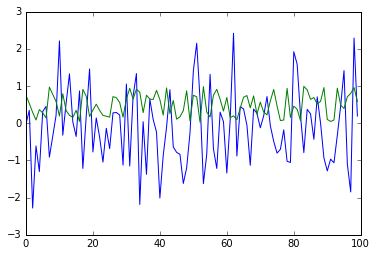

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# There's no 'hold on' function as in Matlab. All graphs are drawn on top of each other in the current figure:
plt.plot(np.random.randn(100))
plt.plot(np.random.uniform(0, 1, 100))

# Style-setting using matplotlibrc and the rcParams module
Off-session style-setting is done in `<mlp-config>/matplotlibrc` where `<mpl-config>` is matplotlib's configuration directory.  
`matplotlib.matplotlib_fname()` returns the path to matplotlib configuration  

In [6]:
!grep 'color' {mpl.matplotlib_fname()} | head -n20

# Colors: for the color values below, you can either use - a
# matplotlib color string, such as r, k, or b - an rgb tuple, such as
# grayscale intensity such as 0.75 - a legal html color name, e.g., red,
#lines.color       : blue    # has no affect on plot(); see axes.prop_cycle
#patch.facecolor        : blue
#patch.edgecolor        : black
#text.color          : black
                            # beware of package collisions: color, geometry, graphicx,
# default face and edge color, default tick sizes,
#axes.facecolor      : white   # axes background color
#axes.edgecolor      : black   # axes edge color
#axes.labelcolor     : black
#axes.prop_cycle    : cycler('color', 'bgrcmyk')
                                            # color cycle for plot lines
                                            # as list of string colorspecs:
#xtick.color          : k      # color of the tick labels
#ytick.color          : k      # color of the tick labels
#grid.color       :   black   # grid color


`matplotlib.rcdefaults()` resets the mpl parameters to matplotlib default values  
__NB:__ these are not the values in matplotlibrc but the default mpl library values!

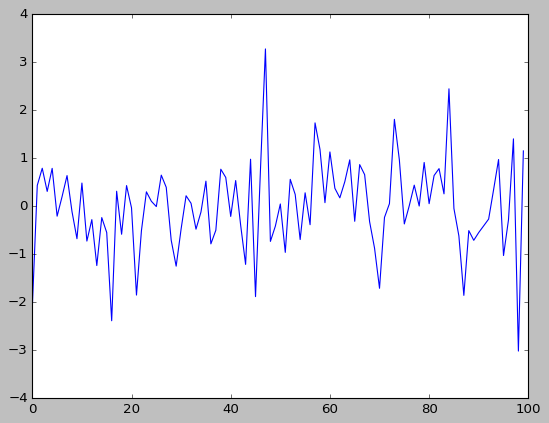

In [10]:
mpl.rcdefaults()
plt.plot(np.random.randn(100))

`matplotlib.rc_file_defaults()` resets matplotlib parameters to their values in matplotlibrc file.  
I have no _uncommented_ parameters there so the output will be the same as before

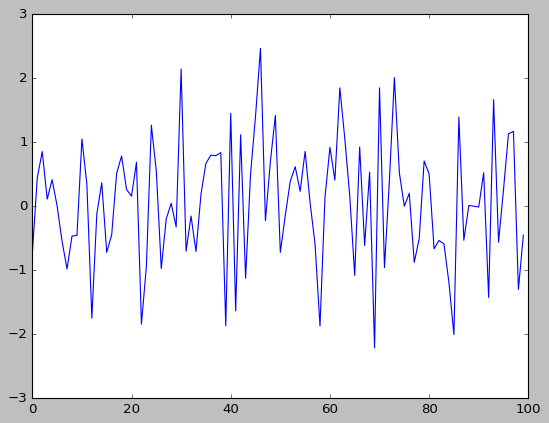

In [11]:
mpl.rc_file_defaults()
plt.plot(np.random.randn(100))

`matplotlib.rcParams` object holds a dictionary of MPL parameters with their current values.  
There're too many of them so we print a sample below containing the word 'axes'

In [12]:
# The currently selected mpl parameters are stored in a dictionary-like object:
print len(mpl.rcParams)
print ['{}: {}'.format(k, v) for i, (k, v) in enumerate(mpl.rcParams.iteritems()) if 'axes' in k]


249
['axes.spines.right: True', 'axes.facecolor: w', 'axes.formatter.limits: [-7, 7]', 'axes.grid.axis: both', 'axes.formatter.use_mathtext: False', 'axes.xmargin: 0.0', 'axes.ymargin: 0.0', 'axes.linewidth: 1.0', 'axes.spines.top: True', "keymap.all_axes: [u'a']", 'axes.spines.bottom: True', 'polaraxes.grid: True', "axes.prop_cycle: cycler(u'color', [u'b', u'g', u'r', u'c', u'm', u'y', u'k'])", 'legend.isaxes: True', 'axes.formatter.use_locale: False', 'axes.grid.which: major', 'axes.edgecolor: k', 'axes.titlesize: large', 'axes3d.grid: True', 'axes.unicode_minus: True', 'axes.labelweight: normal', 'axes.spines.left: True', 'axes.titleweight: normal', 'axes.labelcolor: k', 'axes.axisbelow: False', 'axes.grid: False', 'axes.labelpad: 5.0', 'axes.formatter.useoffset: True', 'axes.labelsize: medium', 'legend.borderaxespad: 0.5', 'axes.hold: True']


In [10]:
# Individual parameters are queried and set like dictionary values:
print mpl.rcParams['figure.dpi']
print mpl.rcParams['axes.prop_cycle']

print mpl.rcParamsDefault['figure.dpi']
print mpl.rcParamsOrig['figure.dpi']


80.0
cycler(u'color', [u'b', u'g', u'r', u'c', u'm', u'y', u'k'])
80.0
80.0


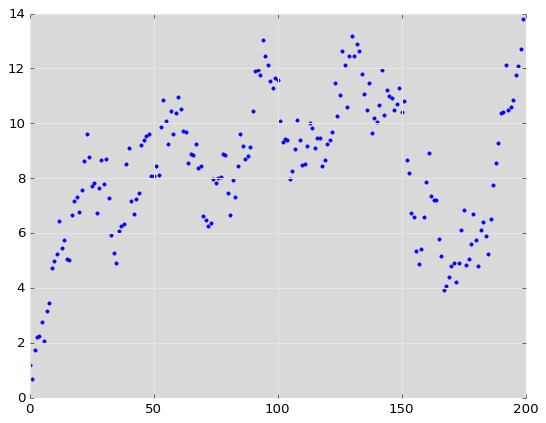

In [11]:
mpl.rcParams['figure.facecolor'] = '1.'
mpl.rcParams['grid.color'] = '.9'
mpl.rcParams['grid.linewidth'] = '1'
mpl.rcParams['lines.linewidth'] = '1.'

# Bulk setting is possible through the mpl.rc utility funcrion:
mpl.rc('axes', facecolor = '.85', grid = True, edgecolor = 'white')
mpl.rcParams['grid.linestyle'] = '-'

plt.plot(np.cumsum(np.random.randn(200)), '.')

-------------------------------------------------------------------------
# Style-setting with the matplotlib.style package

In [12]:
# List the styles available in style package
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'newStyle', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


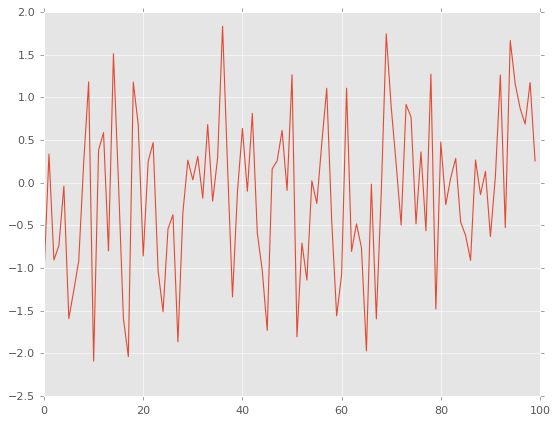

In [13]:
# Load a predefined style (ggplot plots resemble R's ggplot)
plt.style.use('ggplot')
plt.plot(np.random.randn(100))

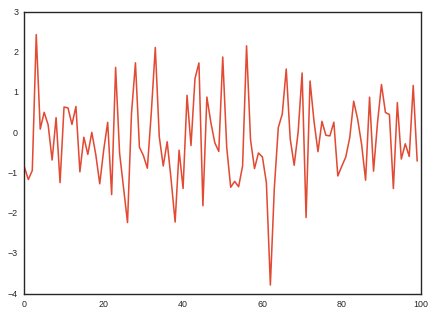

In [14]:
# Use more than one style-sheets
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.plot(np.random.randn(100))

You can change the style of a single figure using style's __context manager__:

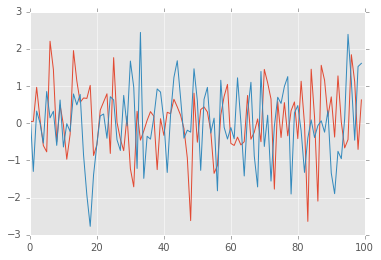

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
with plt.style.context('ggplot'):
    plt.plot(np.random.randn(100))
plt.plot(np.random.randn(100))

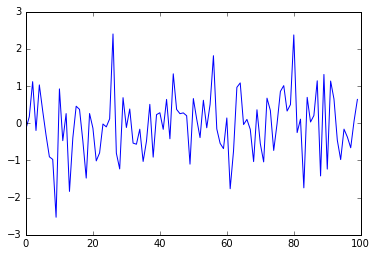

In [5]:
# Resuming to the last global plotting style
plt.plot(np.random.randn(100))

`default` string is reserved by style package and holds a default style

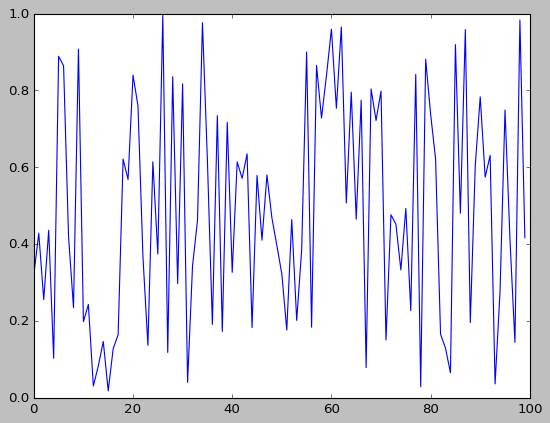

In [17]:
mpl.style.use('default')
plt.plot(np.random.rand(100))

All system-wide style sheets are in the path contained in `BASE_LIBRARY_PATH` constant  

In [18]:
!ls -al {plt.style.core.BASE_LIBRARY_PATH} | tail -n20

-rw-r--r-- 1 root root 25074 Jan 11  2016 classic.mplstyle
-rw-r--r-- 1 root root   477 Jan 11  2016 dark_background.mplstyle
-rw-r--r-- 1 root root   823 Jan 11  2016 fivethirtyeight.mplstyle
-rw-r--r-- 1 root root   957 Jan 11  2016 ggplot.mplstyle
-rw-r--r-- 1 root root   526 Jan 11  2016 grayscale.mplstyle
-rw-r--r-- 1 root root   120 Jan 11  2016 seaborn-bright.mplstyle
-rw-r--r-- 1 root root   124 Jan 11  2016 seaborn-colorblind.mplstyle
-rw-r--r-- 1 root root   657 Jan 11  2016 seaborn-darkgrid.mplstyle
-rw-r--r-- 1 root root   654 Jan 11  2016 seaborn-dark.mplstyle
-rw-r--r-- 1 root root   118 Jan 11  2016 seaborn-dark-palette.mplstyle
-rw-r--r-- 1 root root   118 Jan 11  2016 seaborn-deep.mplstyle
-rw-r--r-- 1 root root   119 Jan 11  2016 seaborn-muted.mplstyle
-rw-r--r-- 1 root root   382 Jan 11  2016 seaborn-notebook.mplstyle
-rw-r--r-- 1 root root   393 Jan 11  2016 seaborn-paper.mplstyle
-rw-r--r-- 1 root root   120 Jan 11  2016 seaborn-pastel.mplstyle
-rw-r--r-- 1 root ro

User-specific style sheets are stored in the path provided by `matplotlib.get_configdir()`  
__NB:__ You _cannot_ add style sheets dynamically. Rather, you have to restart your matplotlib session for the new style to take effect

/home/christos/.config/matplotlib

newStyle.mplstyle contents:
lines.linewidth: 3


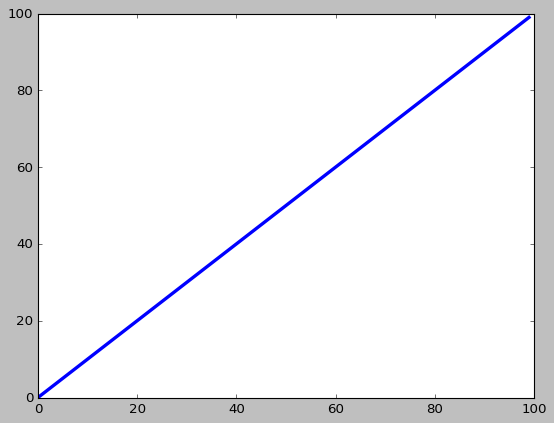

In [19]:
# User-specific style-sheets are defined in the directory:
print mpl.get_configdir()

# You have to restart matplotlib for new style-sheets to be loaded:
# reload(plt) has no effect:

!mkdir -p {mpl.get_configdir()}/stylelib
!echo 'lines.linewidth: 3' | cat > {mpl.get_configdir()}/stylelib/newStyle.mplstyle

print endl, 'newStyle.mplstyle contents:'
!cat /home/christos/.config/matplotlib/stylelib/newStyle.mplstyle

plt.style.use('newStyle')
plt.plot(np.arange(100))

------------------------------
# Graph plotting with pyplot #

### Line plots ###

([<matplotlib.axis.XTick at 0x7f4ec84275d0>,
 <a list of 3 Text xticklabel objects>)

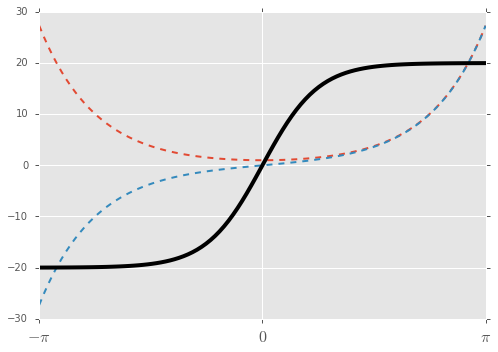

In [6]:
plt.style.use(['seaborn-notebook', 'ggplot'])

x = np.linspace(-4, 4, 100)
cosine = np.cosh(x)
sine = np.sinh(x)

_ = plt.plot(x, cosine, x, sine, linewidth = 2, linestyle = '--')
_ = plt.plot(x, 20 * np.tanh(x), color = 'k', linewidth = 4)

# ticks and tick labels
plt.xticks(np.linspace(-4, 4, 3), [r'$-\pi$', r'$0$', r'$\pi$'], size = 16)

### Filled graph plots ###

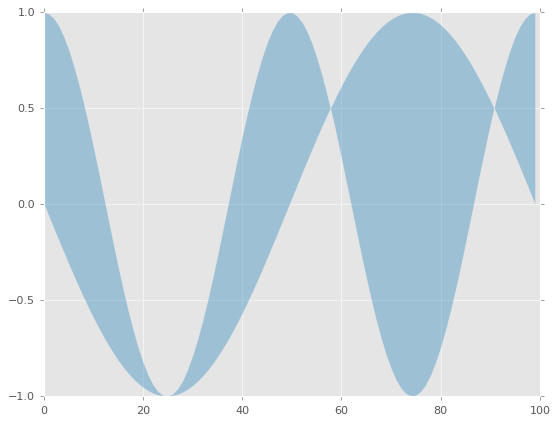

In [21]:
with plt.style.context('ggplot', after_reset = True):
    plt.fill_between(
        np.arange(100), 
        np.sin(np.linspace(-np.pi, np.pi, 100)), 
        np.cos(2 * np.linspace(-np.pi, np.pi, 100)),
        alpha = .4)
    

### Scatter plots ###

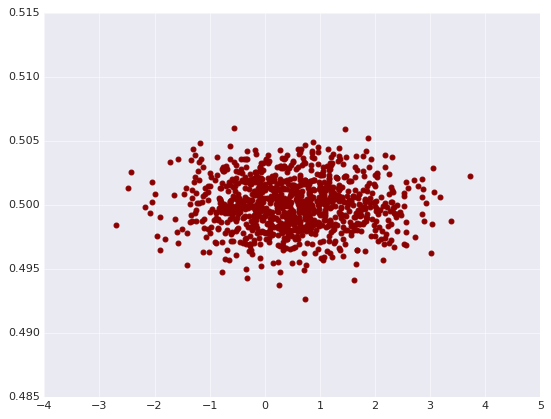

In [22]:
x = np.random.normal(.5, 1, 1000)
y = np.random.normal(.5, .002, 1000)

with plt.style.context('seaborn-darkgrid', after_reset = True):
    plt.scatter(x, y, s = 75, marker = '.', color = 'darkred')

### Barplots ###

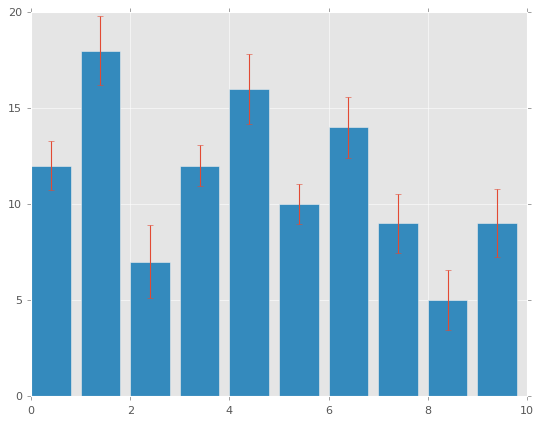

In [23]:
# Barplot (column chart) with error bars
np.random.seed(101)

values = np.random.randint(1, 20, 10)
errors = np.min([values/2, np.random.uniform(1, 2, 10)], 0)

with plt.style.context('ggplot', after_reset = True):
    plt.bar(np.arange(10), values, yerr = errors)

-----------------------------------------------------------
# Arranging multiple plots in a figure #

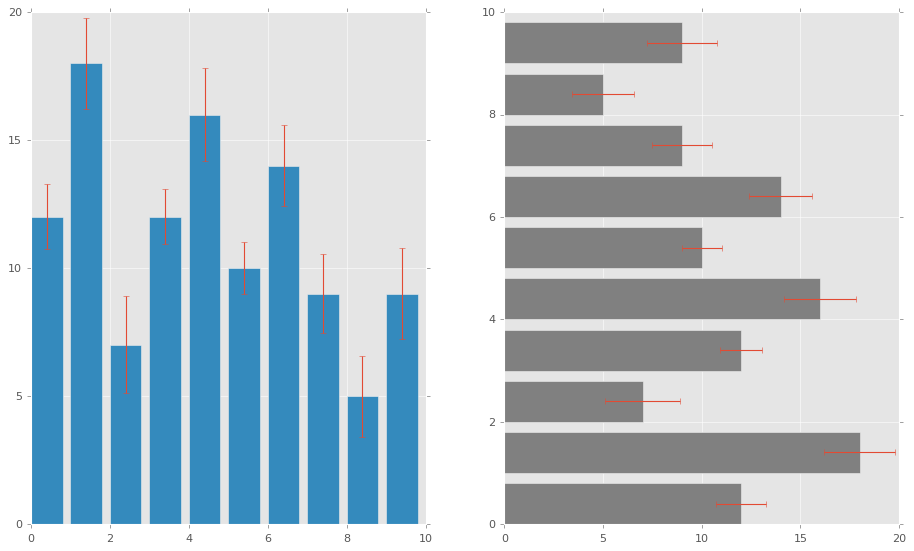

In [7]:
np.random.seed(101)
values = np.random.randint(1, 20, 10)
errors = np.min([values/2, np.random.uniform(1, 2, 10)], 0)

with plt.style.context('ggplot', after_reset = True):
    # fig = plt.figure(figsize = plt.figaspect(.5))
    fig = plt.figure(figsize = [14, 8])

    ax1 = fig.add_subplot('121')
    ax1.bar(np.arange(10), values, yerr = errors)

    ax2 = fig.add_subplot('122')
    ax2.barh(np.arange(10), values, xerr = errors, color = '.5')    